In [1]:
import compute_charge_dist as fz
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import PeHeat_Functions as peh
import parametric_fz as fzpar

import MCMCFit as mcmc

%matplotlib inline

microntocm    = 1.0e-4
cmtomicron    = 1.0e4
AAtocm        = 1.0e-8
cmtoAA        = 1.0e8
microntoAA    = 1.0e4
AAtomicron    = 1.0e-4
ergtoeV       = 6.242e11
eVtoerg       = 1.602e-12

hplanck       = 4.135667662e-15 # eV s
clight        = 2.99792458e10   # cm s-1

Loading the library to compute the charge distribution of dust grains.


In [2]:
def Cool_Grain(grain_size, grain_type, ZZ, fdist, ntot, xe, temp):
    """
    Compute the cooling per grain.
    """
    import numpy as np
    import math
    import compute_charge_dist as fz

    tau = grain_size * fz.AAtocm * fz.kb * temp / fz.echarge**2
    
    # Loop over species!
    Cool_spec = 0
    for partner in ["electron", "hydrogen", "carbon"]:
    
        Cool_Zall = 0
        # Loop over charge
        for zi in range(len(ZZ)):

            if partner == "electron":
                nu          = -1*ZZ[zi]
                stick_coef  = fz.get_stickCoef(ZZ[zi], grain_size, grain_type)
                charge_frac = xe
                mass        = fz.me
                
            elif partner == "hydrogen":
                nu         = ZZ[zi]
                stick_coef = 1.0
                charge_frac = xe
                mass        = fz.mH
                
            elif partner == "carbon":
                nu         = ZZ[zi]
                stick_coef = 1.0
                # Maximum fraction of ionized Carbon is 1e-4*ntot.
                charge_frac = min(1.0e-4, xe)
                mass        = fz.mC

            Cooltilde = 1.0

            if nu < 0:
                Cooltilde = fz.Jtilde_neg(tau, nu)
            elif nu == 0:
                Cooltilde = fz.Jtilde_0(tau, nu)
            else:
                Cooltilde = fz.Jtilde_pos(tau, nu)

            Cool_Zhere = fdist[zi]*Cooltilde*fz.kb*temp
            Cool_Zall += Cool_Zhere
            
        #print("Collisional Partner = ", partner)
        Cool_spec += ntot*charge_frac*stick_coef*np.sqrt(8.0*fz.kb*temp/(np.pi*mass))*Cool_Zall
        
    Cool_tot = math.pi * (grain_size*AAtocm)**2 * Cool_spec
    
    return Cool_tot

In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

from scipy.optimize import curve_fit

import time

%matplotlib inline


grain_type = "silicate"
pcent      = 1

########################################################################################

grain_size = 3

save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju/Old_BeforeSept2018"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_00%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist3 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
#Qabs3 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
Qabs3 = fz.get_QabsTable(grain_type, grain_size)

########################################################################################

grain_size = 5

save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju/Old_BeforeSept2018"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_00%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist5 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
#Qabs5 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
Qabs5 = fz.get_QabsTable(grain_type, grain_size)

########################################################################################

grain_size =10

#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_00%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist10 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
#Qabs10 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
Qabs10 = fz.get_QabsTable(grain_type, grain_size)

########################################################################################

grain_size =50

#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_00%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist50 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
#Qabs50 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
Qabs50 = fz.get_QabsTable(grain_type, grain_size)

########################################################################################

grain_size =100

#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_0%.3iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist100 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
#Qabs100 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
Qabs100 = fz.get_QabsTable(grain_type, grain_size)

########################################################################################

grain_size =500

#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_0%.3iAA_silicate_CR_True_0_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist500 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
#Qabs100 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
Qabs500 = fz.get_QabsTable(grain_type, grain_size)

########################################################################################

grain_size =1000

#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_%.4iAA_silicate_CR_True_0_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist1000 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
#Qabs100 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
Qabs1000 = fz.get_QabsTable(grain_type, grain_size)

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Using the absorption efficiency for a 10 AA grain
I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Using the absorption efficiency for a 10 AA grain


IOError: [Errno 2] No such file or directory: '/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju/fz_01000AA_silicate_CR_True_0_pcent.pkl'

---

In [10]:
Cooling3AA = np.zeros_like(cdist3["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist3["nH"])):

    zmin = cdist3["zminmax"][index*2]
    zmax = cdist3["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist3["G"][index] + cdist3["G_CR"][index]

    ntot = cdist3["nH"][index]
    xe   = cdist3["new_xe"][index]
    temp = cdist3["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist3["fdist"][cum:cum+znum]
    cum +=znum
    
    Cooling3AA[index] = Cool_Grain(3.5, grain_type, ZZfz, ffz, ntot, xe, temp)

In [11]:
Cooling5AA = np.zeros_like(cdist5["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist5["nH"])):

    zmin = cdist5["zminmax"][index*2]
    zmax = cdist5["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist5["G"][index] + cdist5["G_CR"][index]

    ntot = cdist5["nH"][index]
    xe   = cdist5["new_xe"][index]
    temp = cdist5["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist5["fdist"][cum:cum+znum]
    cum +=znum
    
    Cooling5AA[index] = Cool_Grain(5.0, grain_type, ZZfz, ffz, ntot, xe, temp)

In [13]:
Cooling10AA = np.zeros_like(cdist10["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist10["nH"])):

    zmin = cdist10["zminmax"][index*2]
    zmax = cdist10["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist10["G"][index] + cdist10["G_CR"][index]

    ntot = cdist10["nH"][index]
    xe   = cdist10["new_xe"][index]
    temp = cdist10["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist10["fdist"][cum:cum+znum]
    cum +=znum
    
    Cooling10AA[index] = Cool_Grain(10.0, grain_type, ZZfz, ffz, ntot, xe, temp)

In [15]:
Cooling50AA = np.zeros_like(cdist50["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist50["nH"])):

    zmin = cdist50["zminmax"][index*2]
    zmax = cdist50["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist50["G"][index] + cdist50["G_CR"][index]

    ntot = cdist50["nH"][index]
    xe   = cdist50["new_xe"][index]
    temp = cdist50["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist50["fdist"][index]
    cum +=znum
    
    #print("Running cell", index)
    
    #print("Input parameters:", grain_size, grain_type, ZZfz, ffz, ntot, xe, temp, Gtot)
    Cooling50AA[index] = Cool_Grain(50.0, grain_type, ZZfz, ffz, ntot, xe, temp)

In [16]:
Cooling100AA = np.zeros_like(cdist100["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist100["nH"])):
#for index in range(10):

    zmin = cdist100["zminmax"][index*2]
    zmax = cdist100["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist100["G"][index] + cdist100["G_CR"][index]

    ntot = cdist100["nH"][index]
    xe   = cdist100["new_xe"][index]
    temp = cdist100["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist100["fdist"][index]
    cum +=znum
    
    #print("Running cell", index)
    #print(len(ZZfz), len(ffz))
    #print("Input parameters:", grain_size, grain_type, ZZfz, ffz, ntot, xe, temp, Gtot)
    Cooling100AA[index] = Cool_Grain(100.0, grain_type, ZZfz, ffz, ntot, xe, temp)

In [18]:
Cooling500AA = np.zeros_like(cdist500["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist500["nH"])):
#for index in range(10):

    zmin = cdist500["zminmax"][index*2]
    zmax = cdist500["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist500["G"][index] + cdist500["G_CR"][index]

    ntot = cdist500["nH"][index]
    xe   = cdist500["new_xe"][index]
    temp = cdist500["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist500["fdist"][index]
    cum +=znum
    
    #print("Running cell", index)
    #print(len(ZZfz), len(ffz))
    #print("Input parameters:", grain_size, grain_type, ZZfz, ffz, ntot, xe, temp, Gtot)
    Cooling500AA[index] = Cool_Grain(500.0, grain_type, ZZfz, ffz, ntot, xe, temp)

In [19]:
Cooling1000AA = np.zeros_like(cdist1000["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist1000["nH"])):

    zmin = cdist1000["zminmax"][index*2]
    zmax = cdist1000["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist1000["G"][index] + cdist1000["G_CR"][index]

    ntot = cdist1000["nH"][index]
    xe   = cdist1000["new_xe"][index]
    temp = cdist1000["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist1000["fdist"][index]
    cum +=znum
    
    Cooling1000AA[index] = Cool_Grain(1000.0, grain_type, ZZfz, ffz, ntot, xe, temp)

 Why is the cooling for a 50A grain not working?????

Find the combination of parameters that reduces the scatter!!!

In [ ]:
#Something like this:

# Take a combination of parameters, bin it with ~ 50 bins, measure the mean of the Cooling in each bin, compute the scatter.
# Vary one of the parameters, do the same and compare the scatters, which one is tighter?

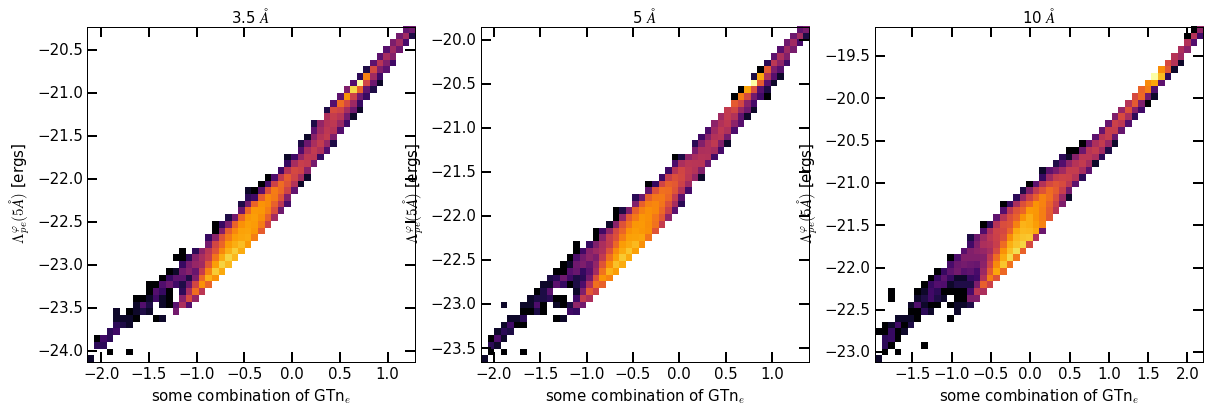

In [136]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(131)

GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
#BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(tempexp[0])*(GTn3)**(gtnexp[0])

ax.hist2d(np.log10(BTfit3),np.log10(Cooling3AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("3.5 $\AA$", fontsize=15)

ax = fig.add_subplot(132)

GTn5 = (cdist5["G"]+cdist5["G_CR"])*np.sqrt(cdist5["temp"])/cdist5["new_ne"]
#BTfit5 = cdist5["new_ne"]*cdist5["temp"]**(0.5)*(GTn5)**(0.25)
BTfit5 = cdist5["new_ne"]*cdist5["temp"]**(tempexp[0])*(GTn5)**(gtnexp[1])

ax.hist2d(np.log10(BTfit5),np.log10(Cooling5AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("5 $\AA$", fontsize=15)

ax = fig.add_subplot(133)

GTn10 = (cdist10["G"]+cdist10["G_CR"])*np.sqrt(cdist10["temp"])/cdist10["new_ne"]
#BTfit10 = cdist10["new_ne"]*cdist10["temp"]**(0.8)*(GTn10)**(0.2)
BTfit10 = cdist10["new_ne"]*cdist10["temp"]**(tempexp[2])*(GTn10)**(gtnexp[2])

ax.hist2d(np.log10(BTfit10), np.log10(Cooling10AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("10 $\AA$", fontsize=15)


fig.show()

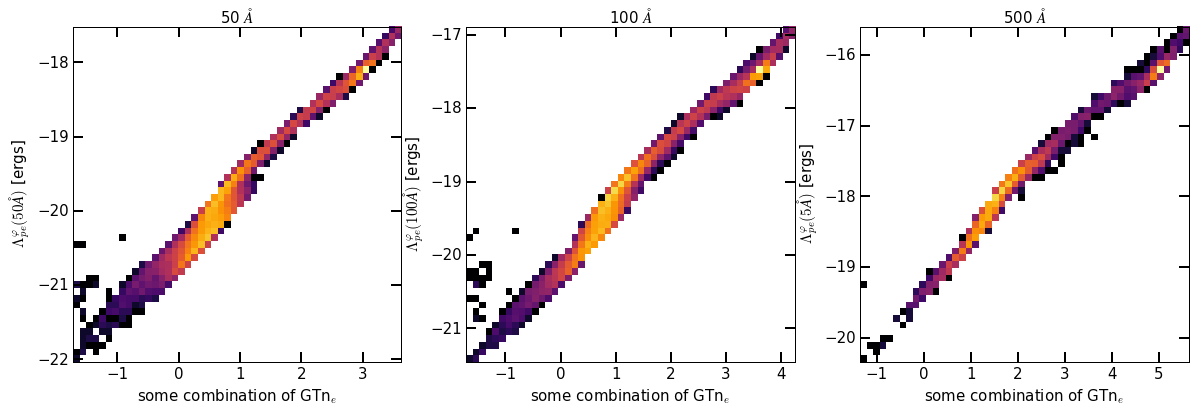

In [137]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(131)

GTn50 = (cdist50["G"]+cdist50["G_CR"])*np.sqrt(cdist50["temp"])/cdist50["new_ne"]
#BTfit50 = cdist50["new_ne"]*cdist50["temp"]**(1.0)*(GTn50)**(0.5)
BTfit50 = cdist50["new_ne"]*cdist50["temp"]**(tempexp[3])*(GTn50)**(gtnexp[3])

ax.hist2d(np.log10(BTfit50),np.log10(Cooling50AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(50 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("50 $\AA$", fontsize=15)

ax = fig.add_subplot(132)

GTn100 = (cdist100["G"]+cdist100["G_CR"])*np.sqrt(cdist100["temp"])/cdist100["new_ne"]
#BTfit100 = cdist100["new_ne"]*cdist100["temp"]**(1.0)*(GTn100)**(0.6)
BTfit100 = cdist100["new_ne"]*cdist100["temp"]**(tempexp[4])*(GTn100)**(gtnexp[4])

ax.hist2d(np.log10(BTfit100),np.log10(Cooling100AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(100 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("100 $\AA$", fontsize=15)

ax = fig.add_subplot(133)

GTn500 = (cdist500["G"]+cdist500["G_CR"])*np.sqrt(cdist500["temp"])/cdist500["new_ne"]
#BTfit500 = cdist500["new_ne"]*cdist500["temp"]**(0.50)*(GTn500)**(0.7)
BTfit500 = cdist500["new_ne"]*cdist500["temp"]**(tempexp[5])*(GTn500)**(gtnexp[5])

ax.hist2d(np.log10(BTfit500), np.log10(Cooling500AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("500 $\AA$", fontsize=15)

fig.show()

In [165]:
gtnexp

array([ 0.20173887,  0.23220072,  0.29139901,  0.4288532 ,  0.48805149,
        0.62550567,  0.68470397])

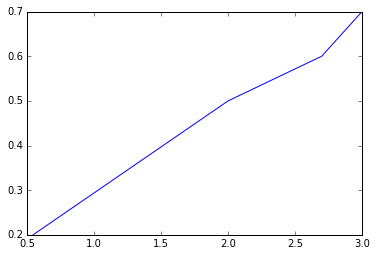

In [167]:
plt.plot(np.log10([3.5, 100, 500, 1000]), [0.2, 0.5, 0.6, 0.7])

In [178]:
xbb = np.log10([3.5, 5, 10, 50,  100, 500])
ybb = np.log10([0.55, 0.58, 0.6, 1.0, 1.05, 1.1])
popt_bbb, pcov_bbb    = curve_fit(function, xbb, ybb)

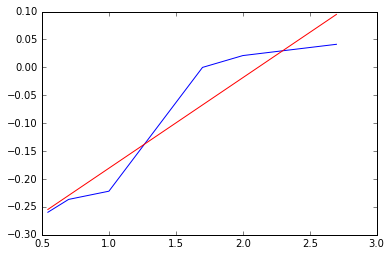

In [180]:
plt.plot(xbb, ybb)
plt.plot(xbb, function(xbb, *popt_bbb), "-r")

In [197]:
tempexp = 10**(function(np.log10(np.array([3.5, 5., 10., 50., 100., 500., 1000.])), *popt_bbb))

In [198]:
print(popt_bbb)

[ 0.1622353  -0.34289129]


In [199]:
print(tempexp)

[ 0.55638544  0.58953056  0.65969624  0.8565281   0.95847173  1.24444845
  1.3925622 ]


In [187]:
def get_beta(asize):
    beta = 0.59 * (asize/5.0)**(0.16)
    return beta 

In [200]:
gtnexp = 10**(function(np.log10(np.array([3.5, 5., 10., 50., 100., 500., 1000.])), *popt_aaa))

In [201]:
print(popt_aaa)

[ 0.22021129 -0.79799019]


In [202]:
print(gtnexp)

[ 0.20980689  0.22695037  0.26437544  0.37682715  0.43896752  0.62568174
  0.72885927]


In [203]:
xaa = np.log10([3.5, 100, 500, 1000])
yaa = np.log10([0.20, 0.5, 0.6, 0.7])
popt_aaa, pcov_aaa    = curve_fit(function, xaa, yaa)

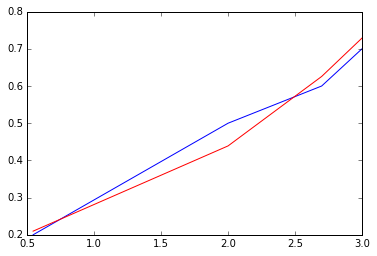

In [205]:
plt.plot(xaa, 10**(yaa))
plt.plot(xaa, 10**(function(xaa, *popt_aaa)), "-r")

In [196]:
5.0**(0.22)*10**(-0.79799019)

0.2268732074334571

In [ ]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(131)

GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)

ax.hist2d(np.log10(BTfit3),np.log10(Cooling3AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("3.5 $\AA$", fontsize=15)


ax = fig.add_subplot(132)


GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)

ax.hist2d(np.log10(BTfit3),np.log10(Cooling3AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("3.5 $\AA$", fontsize=15)

ax = fig.add_subplot(133)


GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)

ax.hist2d(np.log10(BTfit3),np.log10(Cooling3AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("3.5 $\AA$", fontsize=15)

fig.show()

In [60]:
import MCMCFit as mcmc

In [ ]:
GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(tempexp[0])*(GTn3)**(gtnexp[0])

GTn5 = (cdist5["G"]+cdist5["G_CR"])*np.sqrt(cdist5["temp"])/cdist5["new_ne"]
BTfit5 = cdist5["new_ne"]*cdist5["temp"]**(tempexp[1])*(GTn5)**(gtnexp[1])

GTn10 = (cdist10["G"]+cdist10["G_CR"])*np.sqrt(cdist10["temp"])/cdist10["new_ne"]
BTfit10 = cdist10["new_ne"]*cdist10["temp"]**(tempexp[2])*(GTn10)**(gtnexp[0])

GTn50 = (cdist50["G"]+cdist50["G_CR"])*np.sqrt(cdist50["temp"])/cdist50["new_ne"]
BTfit50 = cdist50["new_ne"]*cdist50["temp"]**(tempexp[3])*(GTn50)**(0.2)

GTn100 = (cdist100["G"]+cdist100["G_CR"])*np.sqrt(cdist100["temp"])/cdist100["new_ne"]
BTfit100 = cdist100["new_ne"]*cdist100["temp"]**(tempexp[4])*(GTn100)**(0.2)

GTn500 = (cdist500["G"]+cdist500["G_CR"])*np.sqrt(cdist500["temp"])/cdist500["new_ne"]
BTfit500 = cdist500["new_ne"]*cdist500["temp"]**(tempexp[5])*(GTn500)**(0.2)

GTn1000 = (cdist1000["G"]+cdist1000["G_CR"])*np.sqrt(cdist1000["temp"])/cdist1000["new_ne"]
BTfit1000 = cdist1000["new_ne"]*cdist1000["temp"]**(tempexp[6])*(GTn1000)**(0.2)

In [206]:
GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(tempexp[0])*(GTn3)**(gtnexp[0])

GTn5 = (cdist5["G"]+cdist5["G_CR"])*np.sqrt(cdist5["temp"])/cdist5["new_ne"]
BTfit5 = cdist5["new_ne"]*cdist5["temp"]**(tempexp[1])*(GTn5)**(gtnexp[1])

GTn10 = (cdist10["G"]+cdist10["G_CR"])*np.sqrt(cdist10["temp"])/cdist10["new_ne"]
BTfit10 = cdist10["new_ne"]*cdist10["temp"]**(tempexp[2])*(GTn10)**(gtnexp[2])

GTn50 = (cdist50["G"]+cdist50["G_CR"])*np.sqrt(cdist50["temp"])/cdist50["new_ne"]
BTfit50 = cdist50["new_ne"]*cdist50["temp"]**(tempexp[3])*(GTn50)**(gtnexp[3])

GTn100 = (cdist100["G"]+cdist100["G_CR"])*np.sqrt(cdist100["temp"])/cdist100["new_ne"]
BTfit100 = cdist100["new_ne"]*cdist100["temp"]**(tempexp[4])*(GTn100)**(gtnexp[4])

GTn500 = (cdist500["G"]+cdist500["G_CR"])*np.sqrt(cdist500["temp"])/cdist500["new_ne"]
BTfit500 = cdist500["new_ne"]*cdist500["temp"]**(tempexp[5])*(GTn500)**(gtnexp[5])

GTn1000 = (cdist1000["G"]+cdist1000["G_CR"])*np.sqrt(cdist1000["temp"])/cdist1000["new_ne"]
BTfit1000 = cdist1000["new_ne"]*cdist1000["temp"]**(tempexp[6])*(GTn1000)**(gtnexp[6])

In [207]:
x3 = np.log10(BTfit3)
y3 = np.log10(Cooling3AA)

x5 = np.log10(BTfit5)
y5 = np.log10(Cooling5AA)

x10 = np.log10(BTfit10)
y10 = np.log10(Cooling10AA)

x50 = np.log10(BTfit50)
y50 = np.log10(Cooling50AA)

x100 = np.log10(BTfit100)
y100 = np.log10(Cooling100AA)

x500 = np.log10(BTfit500)
y500 = np.log10(Cooling500AA)

x1000 = np.log10(BTfit1000)
y1000 = np.log10(Cooling1000AA)

In [208]:
from scipy.optimize import curve_fit

In [209]:
def function(x, m, b):

    y = m*x[:] + b
    
    return y

In [210]:
popt_3AA, pcov_3AA    = curve_fit(function, x3, y3)
popt_5AA, pcov_5AA    = curve_fit(function, x5, y5)
popt_10AA, pcov_10AA  = curve_fit(function, x10, y10)
popt_50AA, pcov_50AA  = curve_fit(function, x50, y50)
popt_100AA, pcov_100AA  = curve_fit(function, x100, y100)
popt_500AA, pcov_500AA  = curve_fit(function, x500, y500)
popt_1000AA, pcov_1000AA  = curve_fit(function, x1000, y1000)

In [211]:
print(popt_3AA)
print(popt_5AA)
print(popt_10AA)
print(popt_50AA)
print(popt_100AA)
print(popt_500AA)
print(popt_1000AA)

[  1.36975576 -22.01095726]
[  1.24629792 -21.71694715]
[  1.14232708 -21.35325854]
[  0.89857054 -20.39738067]
[  0.77267035 -19.92053248]
[  0.57837715 -19.03103158]
[  0.52553836 -18.72124287]


In [212]:
mm = [popt_3AA[0], popt_5AA[0], popt_10AA[0],  popt_50AA[0],  popt_100AA[0], popt_500AA[0], popt_1000AA[0]]
bb = [popt_3AA[1], popt_5AA[1], popt_10AA[1], popt_50AA[1], popt_100AA[1], popt_500AA[1], popt_1000AA[1]]
aa = [3.5, 5., 10., 50., 100., 500., 1000.]

In [213]:
print(np.average(mm))

0.933362451401


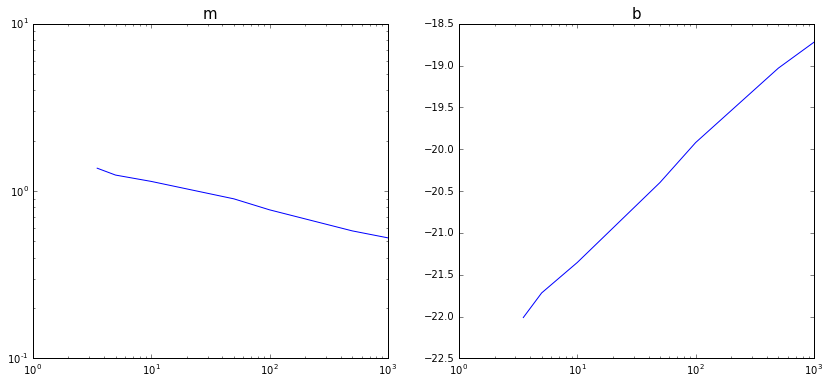

In [214]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)

ax.plot(aa, mm)
#ax.set_ylim(0, 2)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_title("m", fontsize=15)

ax = fig.add_subplot(122)

ax.plot(aa, bb)
ax.set_title("b", fontsize=15)

ax.set_xscale("log")

fig.show()

# Silicate grains

In [215]:
xsize = np.log10(aa)

In [216]:
popt_allb, pcov_all    = curve_fit(function, xsize, bb)
popt_allm, pcov_all    = curve_fit(function, xsize, np.log10(mm))

In [217]:
print(popt_allm)
print(popt_allb)

[-0.1684423   0.22503579]
[  1.34519609 -22.68724981]


In [218]:
print(10**(0.22503579))

1.67894237326


In [159]:
newb = 10**(popt_all[1])
print(newb)

1.83976746142e-23


y = mx + b

log10(Cool0) = m*(log10 (a)) + b

cool0 = a^(m)*10^(b)

In [160]:
cool5 = 5**(popt_all[0])*10**(popt_all[1])
print(cool5)

1.6193906392e-22


## Cooling:

$$ \Lambda(a) = \Lambda_{0}(a)*(BT94)^{1.17747369697}$$

where:
 
$$ \Lambda_{0}(a) = 4.455\times 10^{-22} \left( \frac{a}{5 AA} \right)^{2.25} $$
 
Where BT94 is:

$$ BT94 = n_{e}*T^{1/2}*(G_{tot}T^{1/2}n_{e}^{-1})^{0.2}$$



In [226]:
# This is going to change quite a lot.

def Cooling_par(asize, Gtot, T, ne):
    """
    Parametric cooling function.
    
    returns cooling rate in:
        erg s-1
    """
    import numpy as np
    
    Lambda0 = 4.455e-22 * (asize/5.0)**(2.24973538)
    psi     = ne * np.sqrt(T) * (Gtot*np.sqrt(T)/ne)**(0.2)
    
    coolhere = Lambda0 * psi**(1.17747369697)
    
    return coolhere

In [227]:
# This is going to change quite a lot.

def Cooling_par_new(asize, Gtot, T, ne):
    """
    Parametric cooling function.
    
    returns cooling rate in:
        erg s-1
    """
    import numpy as np
    
    #Lambda0 = 4.455e-22 * (asize/5.0)**(2.24973538)
    psi     = (Gtot*np.sqrt(T)/ne)
    
    Lambda0 = 10.**(-22.7+asize*1.34)
    beta    = 0.3*np.log10(asize)+0.38 
    alpha   = 0.2*np.log10(asize)+0.09
    BT94    = ne * T**(beta)*psi**(alpha)
    
    coolhere = Lambda0 * BT94 **(1.68*asize**(-0.17))
    
    return coolhere

In [228]:
def Cooling_par_BTin(asize, BT94):
    """
    Parametric cooling function.
    
    returns cooling rate in:
        erg s-1
    """
    import numpy as np
    
    Lambda0 = 4.4552e-22 * (asize/5.0)**(2.24973538)
    
    #BT94 = ne * np.sqrt(T) * (Gtot*np.sqrt(T)/ne)**(0.2)
    
    coolhere = Lambda0 * BT94**(1.17747369697)
    
    return coolhere

In [230]:
Gtot3 = cdist3["G"] + cdist3["G_CR"]
temp3 = cdist3["temp"]
ne3   = cdist3["new_ne"]

GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)


parCool3 = Cooling_par(3.5, Gtot3, temp3, ne3)
parCoolBT = Cooling_par_BTin(3.5,  BTfit3)
parCool3new = Cooling_par_new(3.5, Gtot3, temp3, ne3)

In [240]:
np.max(np.log10(Cooling3AA))

-20.236513818243569

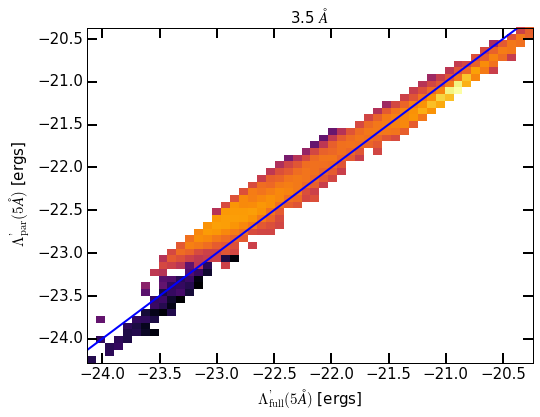

In [242]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist2d(np.log10(Cooling3AA),np.log10(parCool3), bins=50, norm=LogNorm(), cmap="inferno", normed=True, weights=GTn3)
ax.plot([np.min(np.log10(Cooling3AA)), np.max(np.log10(Cooling3AA))], [np.min(np.log10(Cooling3AA)), np.max(np.log10(Cooling3AA))], "-b", linewidth=2)

ax.set_xlabel("$\Lambda^{\mathrm{'}}_{\mathrm{full}}(5 \\AA)$ [ergs]", fontsize=15)
ax.set_ylabel(" $\Lambda^{\mathrm{'}}_{\mathrm{par}}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("3.5 $\AA$", fontsize=15)

fig.show()

In [243]:
Gtot10 = cdist10["G"] + cdist10["G_CR"]
temp10 = cdist10["temp"]
ne10   = cdist10["new_ne"]

GTn10 = (Gtot10)*np.sqrt(temp10)/ne10

parCool10 = Cooling_par(10,  Gtot10, temp10, ne10)

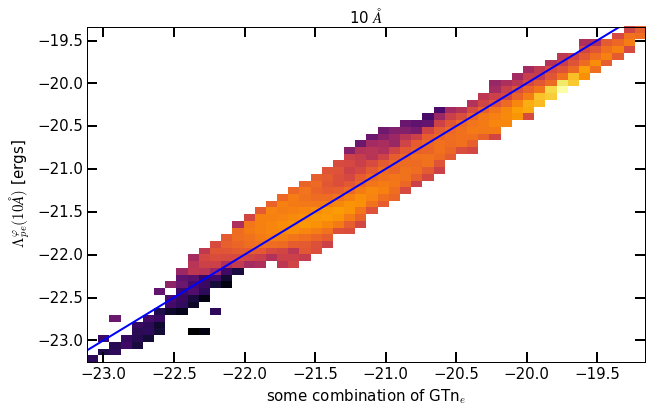

In [244]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


ax.hist2d(np.log10(Cooling10AA),np.log10(parCool10), bins=50, norm=LogNorm(), cmap="inferno", normed=True, weights=GTn3)
ax.plot([np.min(np.log10(Cooling10AA)), np.max(np.log10(Cooling10AA))], [np.min(np.log10(Cooling10AA)), np.max(np.log10(Cooling10AA))], "-b", linewidth=2)

ax.set_xlabel("$\Lambda^{\mathrm{'}}_{\mathrm{full}}(5 \\AA)$ [ergs]", fontsize=15)
ax.set_ylabel(" $\Lambda^{\mathrm{'}}_{\mathrm{par}}(5 \\AA)$ [ergs]", fontsize=15)


ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(10 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("10 $\AA$", fontsize=15)

fig.show()

In [245]:
Gtot100 = cdist100["G"] + cdist100["G_CR"]
temp100 = cdist100["temp"]
ne100   = cdist100["new_ne"]

GTn100 = (Gtot100)*np.sqrt(temp100)/ne100
BTfit100 = ne100*temp100**(0.5)*(GTn100)**(0.5)


parCool100 = Cooling_par(100,  Gtot100, temp100, ne100)
#parCoolBT100 = Cooling_par_BTin(100,  BTfit100)

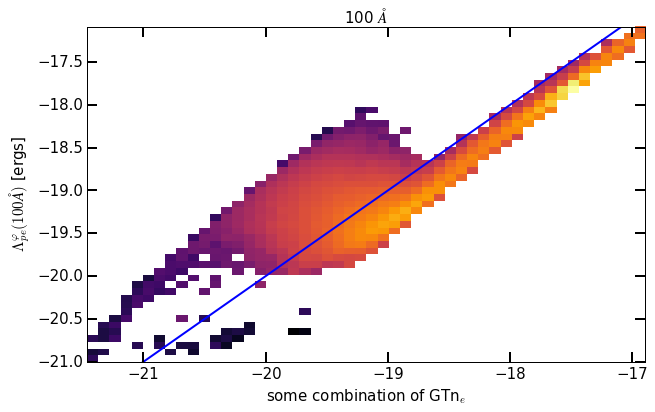

In [246]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


ax.hist2d(np.log10(Cooling100AA),np.log10(parCool100), bins=50, norm=LogNorm(), cmap="inferno", normed=True, weights=GTn3)
ax.plot([np.min(np.log10(Cooling100AA)), np.max(np.log10(Cooling100AA))], [np.min(np.log10(Cooling100AA)), np.max(np.log10(Cooling100AA))], "-b", linewidth=2)

ax.set_xlabel("$\Lambda^{\mathrm{'}}_{\mathrm{full}}(5 \\AA)$ [ergs]", fontsize=15)
ax.set_ylabel(" $\Lambda^{\mathrm{'}}_{\mathrm{par}}(5 \\AA)$ [ergs]", fontsize=15)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("100 $\AA$", fontsize=15)

fig.show()

---

I need to check if this is still valid for carbonaceous grains. I think it should, they use the same equations and there was no distinction between grains in Draine & Sutin 1987.

In [ ]:
Gtot = Gtot10
ne = ne10
T = temp10

In [ ]:
bestfit = True

# Initial guess
alpha = 0.2
beta = 0.8
gamma = 0.7

GTn_comb = Gtot**(alpha)*ne**(beta)*T**(gamma)

logarr = np.logspace(np.log10(np.min(GTn_comb)), np.log10(np.max(GTn_comb)), num=10)

mean = np.zeros_like(logarr, dtype=np.float)
std  = np.zeros_like(logarr, dtype=np.float)

for i in range(len(logarr)-1):
#for i in range(2):
    mask = np.where((GTn_comb >= logarr[i]) & (GTn_comb < logarr[i+1]))
    GTnhere = GTn_comb[mask]
    #print(logarr[i], logarr[i+1])
    #print(len(GTnhere), np.min(GTnhere), np.max(GTnhere))
    mean[i] = np.average(GTnhere)
    std[i] = np.std(GTnhere)
    
mean[-1] = mean[-2]
std[-1] = std[-2]

if bestfit:
    alphabest = alpha
    betabest=beta
    gammabest=gamma
    bestfit = False

In [ ]:
plt.plot(np.log10(logarr), np.log10(mean))
plt.plot(np.log10(logarr), np.log10(std))

In [ ]:
bestfit = True

# Initial guess
alpha = 1.0974368543429029 # 0.2
beta = 0.8
gamma = 0.7

counter = 0

while counter < 500:

    GTn_comb = Gtot**(alpha)*ne**(beta)*T**(gamma)

    logarr = np.logspace(np.log10(np.min(GTn_comb)), np.log10(np.max(GTn_comb)), num=10)

    mean = np.zeros_like(logarr, dtype=np.float)
    std  = np.zeros_like(logarr, dtype=np.float)

    for i in range(len(logarr)-1):
        mask = np.where((GTn_comb >= logarr[i]) & (GTn_comb < logarr[i+1]))
        GTnhere = GTn_comb[mask]
        mean[i] = np.average(GTnhere)
        std[i] = np.std(GTnhere)

    mean[-1] = mean[-2]
    std[-1] = std[-2]

    if bestfit == False:
        if np.average(std) < np.average(beststd):
            bestfit = True
            print("Found a better combination of parameters that minimizes the scatter:")
            print("alpha=", alpha, "beta=", beta, "gamma=", gamma)
        
    if bestfit:
        alphabest = alpha
        betabest=beta
        gammabest=gamma
        
        bestmean= mean
        beststd = std
        
        bestfit = False
        
    # SHould test both positie and negative!!
    #alpha = alpha - 0.1*np.random.rand(1)[0]
    #beta = beta + 0.1*np.random.rand(1)[0]
    gamma = gamma - 0.1*np.random.rand(1)[0]
    
    counter+=1